<a href="https://colab.research.google.com/github/juliooaa/analytics-rj/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

<center><img alt="Rio de Janeiro" width="40%" src="http://1.bp.blogspot.com/_ySVpOzpLP7Q/TPhjmP0WzXI/AAAAAAAAAIc/TO2_0xSqx8k/s1600/cristo_violencia_rio_brasil.jpg"></center>

O Rio de Janeiro (RJ) é um estado brasileiro localizado na região Sudeste do país, fazendo divisas com os estados do Espírito Santo, a norte; Minas Gerais, a noroeste; e São Paulo, a sudoeste. Toda a sua costa leste é banhada pelo Oceano Atlântico, o que contribui para o grande número de praias e pontos turísticos. A sua capital é a cidade do Rio de Janeiro, conhecida turisticamente como a **Cidade Maravilhosa**

Além disso, possui uma geografia privilegiada: praias, montanhas e lagoas que se combinam em um visual deslumbrante. Com lindas atrações como o Cristo Redentor, Pão de açucar e um litoral com quilômetros de praias, entre elas as famosas Copacabana e Ipanema.

Porém, o Rio de Janeiro também se destaca pelos altos índices de violência e criminalidade que mancham sua belezas e assustam os turistas.



**Neste notebook, iremos analisar dados sobre a violência do Rio de Janeiro e ver quais insights podemos obter a partir dos dados brutos**


## Obtenção dos Dados


Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

### Importando os dados



In [43]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados



Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

In [ ]:
# dimensões do dataset

print("Variáveis: {}".format(df.shape[1]))
print("Entradas: {}".format(df.shape[0]))

Variáveis: 56
Entradas: 344


Vamos dar uma olhada agora nas variáveis do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

Podemos observar que o nosso conjunto de dados é consituido basicamente de valores inteiros e float

Após entender sobre o tamanho e os tipos da variáveis do nosso dataset vamos dar uma olhada nas 5 primeiras entradas

In [ ]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


### Análise de valores ausentes

Uma boa verificação inicial a se fazer tembém é entender os conjuntos de valores ausentes do nosso dataset

In [ ]:
# Porcentagem de valores ausentes

(df.isnull().sum() / df.shape[0]) * 100

vano                           0.000000
mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000


Acima, podemos ver que algumas das variáveis tem valores faltantes em proporções consideráveis como é o exemplo de crimes relacionados a bicicletas e apreensão de drogas.

Como os dados estão estruturados ao longo do tempo, uma forma de realizar uma análise que condiza melhor com a realidade, podemos analisá-los a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como por exemplo:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)

### Retirar variáveis ausentes

In [46]:
# Selecionando as 30 colunas com valores ausentes
coluna_drop =(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) [:30]

# transformando em lista
coluna_drop = coluna_drop.index.tolist()

coluna_drop


['roubo_bicicleta',
 'furto_bicicleta',
 'apreensao_drogas_sem_autor',
 'posse_drogas',
 'apf',
 'aaapai',
 'cmp',
 'trafico_drogas',
 'cmba',
 'sequestro_relampago',
 'furto_coletivo',
 'extorsao',
 'furto_celular',
 'roubo_apos_saque',
 'roubo_conducao_saque',
 'roubo_cx_eletronico',
 'estupro',
 'estelionato',
 'pol_civis_mortos_serv',
 'pol_militares_mortos_serv',
 'pessoas_desaparecidas',
 'encontro_ossada',
 'roubo_celular',
 'lesao_corp_culposa',
 'ameaca',
 'sequestro',
 'lesao_corp_morte',
 'registro_ocorrencias',
 'hom_por_interv_policial',
 'hom_culposo']

Agora vamos excluir essas colunas do dataset

In [47]:
# excluir colunas com valores ausentes
df.drop(coluna_drop, axis=1, inplace=True)


# visualizar o dataset limpo
df.head()

,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
0,1991,1,657,15,162,3051,350,188,1174,63,967,381,37,158,3318,2009,1147,3561,6717,133,872,217,672,1348,1174,3
1,1991,2,732,17,175,3421,357,171,1097,64,963,432,35,142,3261,1850,1066,3309,6225,127,751,209,749,1395,1097,3
2,1991,3,713,25,216,3613,443,191,1265,71,963,422,43,131,3529,2084,1062,3573,6719,80,789,188,738,1385,1265,3
3,1991,4,634,20,200,3211,425,199,1415,81,1186,354,36,112,3808,2085,1195,3290,6570,133,787,140,654,1540,1415,3
4,1991,5,650,20,146,3051,553,231,1449,82,931,335,27,147,3755,2185,723,3546,6454,163,845,78,670,1266,1449,3


### Estruturando o dataset

Para organizar o *dataset* e ter uma análise mais clara dos dados, vamos renomear a coluna vano para ano, criar uma coluna date e converter a nova coluna para datetime

In [51]:
# Renomear a coluna ano
df.rename(columns={'vano': 'ano'}, inplace=True)

# Criar a coluna data
df['data'] = df['mes'].astype(str) + '/' + df['ano'].astype(str)

# Converter a coluna data para datetime
df['data'] = pd.to_datetime(df['data'], format='%m/%Y')

# Verificando as variáveis
print(df.dtypes)

ano                              int64
mes                              int64
hom_doloso                       int64
latrocinio                       int64
tentat_hom                       int64
lesao_corp_dolosa                int64
roubo_comercio                   int64
roubo_residencia                 int64
roubo_veiculo                    int64
roubo_carga                      int64
roubo_transeunte                 int64
roubo_em_coletivo                int64
roubo_banco                      int64
outros_roubos                    int64
total_roubos                     int64
furto_veiculos                   int64
furto_transeunte                 int64
outros_furtos                    int64
total_furtos                     int64
apreensao_drogas                 int64
recuperacao_veiculos             int64
encontro_cadaver                 int64
indicador_letalidade             int64
indicador_roubo_rua              int64
indicador_roubo_veic             int64
fase                     

In [52]:
# Visualizar os dados
df.head()

,ano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase,data
0,1991,1,657,15,162,3051,350,188,1174,63,967,381,37,158,3318,2009,1147,3561,6717,133,872,217,672,1348,1174,3,1991-01-01
1,1991,2,732,17,175,3421,357,171,1097,64,963,432,35,142,3261,1850,1066,3309,6225,127,751,209,749,1395,1097,3,1991-02-01
2,1991,3,713,25,216,3613,443,191,1265,71,963,422,43,131,3529,2084,1062,3573,6719,80,789,188,738,1385,1265,3,1991-03-01
3,1991,4,634,20,200,3211,425,199,1415,81,1186,354,36,112,3808,2085,1195,3290,6570,133,787,140,654,1540,1415,3,1991-04-01
4,1991,5,650,20,146,3051,553,231,1449,82,931,335,27,147,3755,2185,723,3546,6454,163,845,78,670,1266,1449,3,1991-05-01


## Informações Estatísticas da Violência no Rio de Janeiro


Após uma primeira análise e entendimento do nosso dataset o próximo passo é explorar análises estatísticas para entendermos melhor o o conjunto de dados e indentificar outliers por exemplo.

In [ ]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

### Total de furtos e roubos

Para fazermos a análise precisamos antes entender a diferença entre furto e roubo.

Apesar de serem crimes contra o patrimônio, ambos se diferem pela forma como são praticados

* Furto: Não há utilização de ameaça ou violência contra a vítima
* Roubo: Há a utilização de ameaça ou violência contra a vítima

O dataset nos fornece os totais de roubos e furtos, vamos observar separadamente esses números.

In [56]:
# Ver resumo estatístico das colunas de totais de furtos e roubos
df[['total_furtos', 'total_roubos']].describe()

,total_furtos,total_roubos
count,344.000000,344.000000
mean,10433.177326,9428.119186
std,3696.725756,4578.013053
min,4691.000000,3261.000000
25%,6700.250000,5107.750000
50%,10448.500000,9243.500000
75%,13877.500000,11590.500000
max,18003.000000,23203.000000


A partir dessa análise, observamos:
* A média total de furtos é maior do que a média do total de roubos
* A amplitude de roubos é maior que a de furtos com mínimo de 3261 e máximo de 203203 roubos por mês, ou seja, há maior variação das ocorrências de roubos quando comparadas com as ocorrências de furtos

### Crimes contra o patrimônio - Veículos

Nesta seção vamos analisar os roubos e furtos de veículos, uma prática muito comum em grandes metrópoles.

In [63]:
# Calcular a média das seguintes variáveis: roubo_veiculo, furto_veiculos e recuperacao_veiculos

media_roubo_veiculo = df.roubo_veiculo.mean()
media_furto_veiculo = df.furto_veiculos.mean()
media_recuperacao_veiculo = df.recuperacao_veiculos.mean()
rec = df.recuperacao_veiculos.sum()/(df.furto_veiculos.sum() + df.roubo_veiculo.sum()) * 100

# Printar esses valores

print("Média de roubos de veículos: {:.2f}".format(media_roubo_veiculo))
print("Média do furto de veiculos: {:.2f}".format(media_furto_veiculo))
print("Média da recuperação de veículos: {:.2f}".format(media_recuperacao_veiculo))
print("Porcentagem de recuperação de veículos: {:.2f}%".format(rec))

Média de roubos de veículos: 2448.70
Média do furto de veiculos: 1674.67
Média da recuperação de veículos: 1772.24
Porcentagem de recuperação de veículos: 42.98%


In [58]:
df[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']].describe()

,roubo_veiculo,furto_veiculos,recuperacao_veiculos
count,344.000000,344.000000,344.000000
mean,2448.697674,1674.671512,1772.238372
std,789.689559,294.852020,656.761843
min,1097.000000,1159.000000,729.000000
25%,1889.750000,1430.500000,1276.750000
50%,2322.000000,1637.500000,1755.000000
75%,2778.000000,1833.250000,2202.000000
max,5358.000000,2630.000000,3695.000000


Observando o resumo estatístico das variáveis, vemos:
* Ao contrário do observado nos valores totais, a média de roubo é maior que a de furto, ou seja, em média, há mais crimes com presença de ameaça ou violência contra a vítima.
* Assim como observado nos valores totais, a amplitude de roubos de carros no período foi maior que a de furtos, o que indica que há menos variação das ocorrências de furtos quando comparadas com as ocorrências de roubos

In [66]:
# ver porcentagem de furtos de veículos
fv = (df.furto_veiculos.sum() / df.total_furtos.sum()) * 100

print("A % de veículos que são furtados com relação ao total de furtos é de {:.2f}%".format(fv))

A % de veículos que são furtados com relação ao total de furtos é de 16.05%


In [68]:
# ver porcentagem de roubos de veículos
rv = (df.roubo_veiculo.sum() / df.total_roubos.sum()) * 100

print("A % de veículos que são roubados com relação ao total de roubos é de {:.2f}%".format(rv))

A % de veículos que são roubados com relação ao total de roubos é de 25.97%


### Crimes contra a vida

Vamos analisar agora os valores máximos e mínimos de homicídios dolosos no nosso dataset.

Homicídio doloso é aquele em que há intenção ou assume-se o risco de matar.

In [ ]:
hom_max = df.hom_doloso.max()
hom_min = df.hom_doloso.min()

print("Máximo de homicídios em um único mês: {}".format(hom_max))
print("Mínimo de homicídios em um único mês: {}".format(hom_min))

Máximo de homicídios em um único mês: 831
Mínimo de homicídios em um único mês: 272


Podemos aprofundar ainda mais e descobrir quando esses homicídios aconteceram

In [ ]:
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [ ]:
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


O máximo de homicídios dolosos foram registrados em janeiro de 1995 e o mínimo em junho de 2015

Outra análise que pode ser feita é de qual a média diária de homicídios dolosos 

In [ ]:
df_hom_dia = (df.hom_doloso.mean()) / 30
print("A média diária de mortes é de: {:.2f}".format(df_hom_dia))

A média diária de mortes é de: 16.82


## Visualização de Dados

Vamos analisar os dados através de gráficos para uma melhor visualização


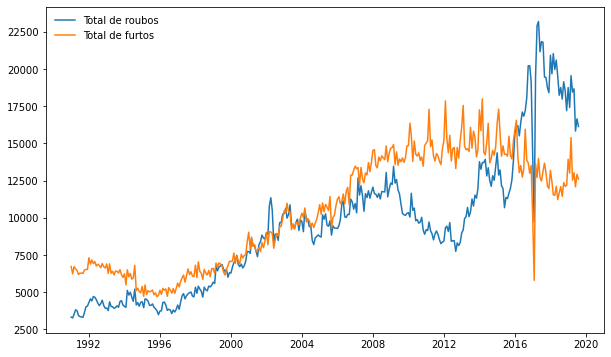

In [70]:
# plotar gráfico de linha de totais de roubos e furtos
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['data'], df['total_roubos'], label='Total de roubos');
ax.plot(df['data'], df['total_furtos'], label='Total de furtos');
plt.legend(frameon=False);
plt.show();

Podemos observar alguns pontos interessantes:
* O número de roubos e furtos é crescente ao longo dos anos.
* No final de 2016 observa-se um aumento considerável de roubos seguido de um forte queda. Isso se explica pela greve de policiais que afetaram os registros

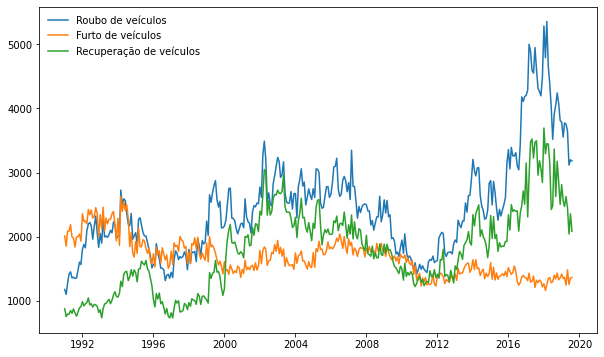

In [73]:
# Plotar gráfico de roubo, furto e recuperação de veículos
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['data'], df['roubo_veiculo'], label='Roubo de veículos');
ax.plot(df['data'], df['furto_veiculos'], label='Furto de veículos');
ax.plot(df['data'], df['recuperacao_veiculos'], label='Recuperação de veículos');
plt.legend(frameon=False);
plt.show();

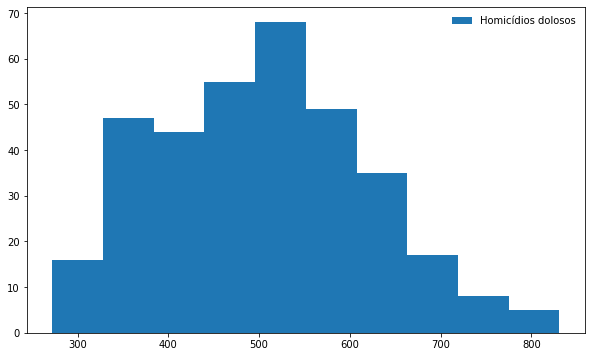

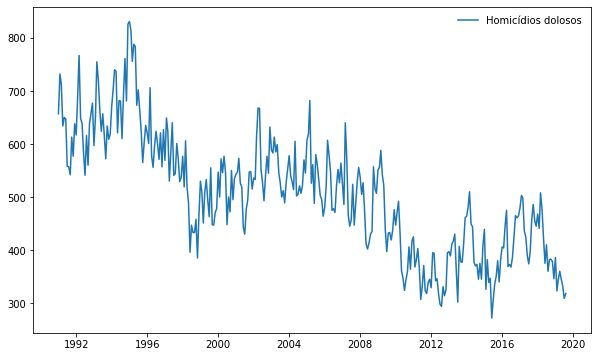

In [77]:
# plotar histograma de homicídios dolosos
df.hom_doloso.hist(grid=False, figsize=(10,6), label='Homicídios dolosos');
plt.legend(frameon=False);
plt.show();

# plotar gráfico de linhas de homicídios dolosos
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['data'], df['hom_doloso'], label='Homicídios dolosos');
plt.legend(frameon=False);
plt.show();

No gráfico acima, alguns dados chamam a nossa atenção, como:

* Houveram quase 70 meses com 500-550 homicídios dolosos registrados ao longo do período em estudo.
* Houveram menos de 10 meses ao longo de todo o período estudado na casa de 800 registros de homicídio doloso.
* As ocorrências de homicídios dolosos vem diminuindo ao longo do tempo

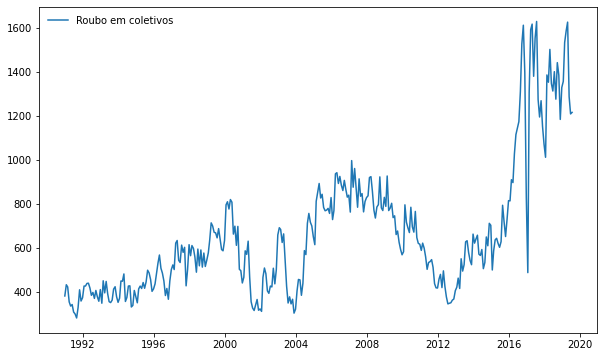

In [79]:
# plotar gráfico de linhas para roubos em coletivos
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['data'], df['roubo_em_coletivo'], label='Roubo em coletivos');
plt.legend(frameon=False);
plt.show();

## Conclusão


A partir dessas análises podemos tirar alguns insights interessantes:
* O estado do Rio de Janeiro tem uma média diária de 16 mortes
* Número máximo de mortes diárias de 831 e um mínimo de 272
* apenas uma média de 42% dos veículos roubados ou furtados são recuperados.
* aumento significativo de roubos de veículos e em coletivos
